🚀 Model Experiments - Aviation Safety Research
📥 Loading processed features...
✅ Features loaded: (84983, 30)
✅ Target distribution:
Severe_Accident
0    61995
1    22988
Name: count, dtype: int64
Severe accident rate: 27.050%

🎯 TRAIN-TEST SPLIT
Training set: (67986, 30)
Test set: (16997, 30)
Training severe rate: 27.050%
Test severe rate: 27.052%

🤖 INITIALIZING MODELS
Models initialized:
  • Random Forest
  • XGBoost
  • Gradient Boosting
  • Logistic Regression
  • SVM
  • Naive Bayes

📊 CROSS-VALIDATION EVALUATION
Evaluating Random Forest...
✅ Features loaded: (84983, 30)
✅ Target distribution:
Severe_Accident
0    61995
1    22988
Name: count, dtype: int64
Severe accident rate: 27.050%

🎯 TRAIN-TEST SPLIT
Training set: (67986, 30)
Test set: (16997, 30)
Training severe rate: 27.050%
Test severe rate: 27.052%

🤖 INITIALIZING MODELS
Models initialized:
  • Random Forest
  • XGBoost
  • Gradient Boosting
  • Logistic Regression
  • SVM
  • Naive Bayes

📊 CROSS-VALIDATION EVALUATION
E

,Model,CV Mean F1,CV Std
0,Random Forest,1.000000,0.000000
1,XGBoost,1.000000,0.000000
2,Gradient Boosting,1.000000,0.000000
3,Logistic Regression,0.999851,0.000126
4,SVM,0.999385,0.000201
5,Naive Bayes,0.887373,0.003952



🎯 TRAINING AND EVALUATION
Training Random Forest...
  ✅ Random Forest: F1 = 1.0000
Training XGBoost...
  ✅ Random Forest: F1 = 1.0000
Training XGBoost...
  ✅ XGBoost: F1 = 1.0000
Training Gradient Boosting...
  ✅ XGBoost: F1 = 1.0000
Training Gradient Boosting...
  ✅ Gradient Boosting: F1 = 1.0000
Training Logistic Regression...
  ✅ Gradient Boosting: F1 = 1.0000
Training Logistic Regression...
  ✅ Logistic Regression: F1 = 0.9998
Training SVM...
  ✅ Logistic Regression: F1 = 0.9998
Training SVM...
  ✅ SVM: F1 = 0.9997
Training Naive Bayes...
  ✅ SVM: F1 = 0.9997
Training Naive Bayes...
  ✅ Naive Bayes: F1 = 0.8316

🎛️ HYPERPARAMETER TUNING
Tuning top models: ['Random Forest', 'XGBoost']

Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
  ✅ Naive Bayes: F1 = 0.8316

🎛️ HYPERPARAMETER TUNING
Tuning top models: ['Random Forest', 'XGBoost']

Tuning Random Forest...
Fitting 5 folds for each of 81 candidates, totalling 405 fits
  ✅ Best parameters: {'ma

,accuracy,precision,recall,f1,roc_auc
Random Forest,1.0,1.0,1.0,1.0,1.0
XGBoost,1.0,1.0,1.0,1.0,1.0
Gradient Boosting,1.0,1.0,1.0,1.0,1.0
Logistic Regression,0.999529,1.0,0.99826,0.999129,0.999183
SVM,0.999059,0.998043,0.998478,0.99826,0.999932
Naive Bayes,0.915279,0.895541,0.777512,0.832363,0.986183



🎉 BEST MODEL: Random Forest
📈 Performance Metrics:
  • Accuracy:  1.0000
  • Precision: 1.0000
  • Recall:    1.0000
  • F1-Score:  1.0000
  • ROC-AUC:   1.0000

📊 MODEL PERFORMANCE VISUALIZATION


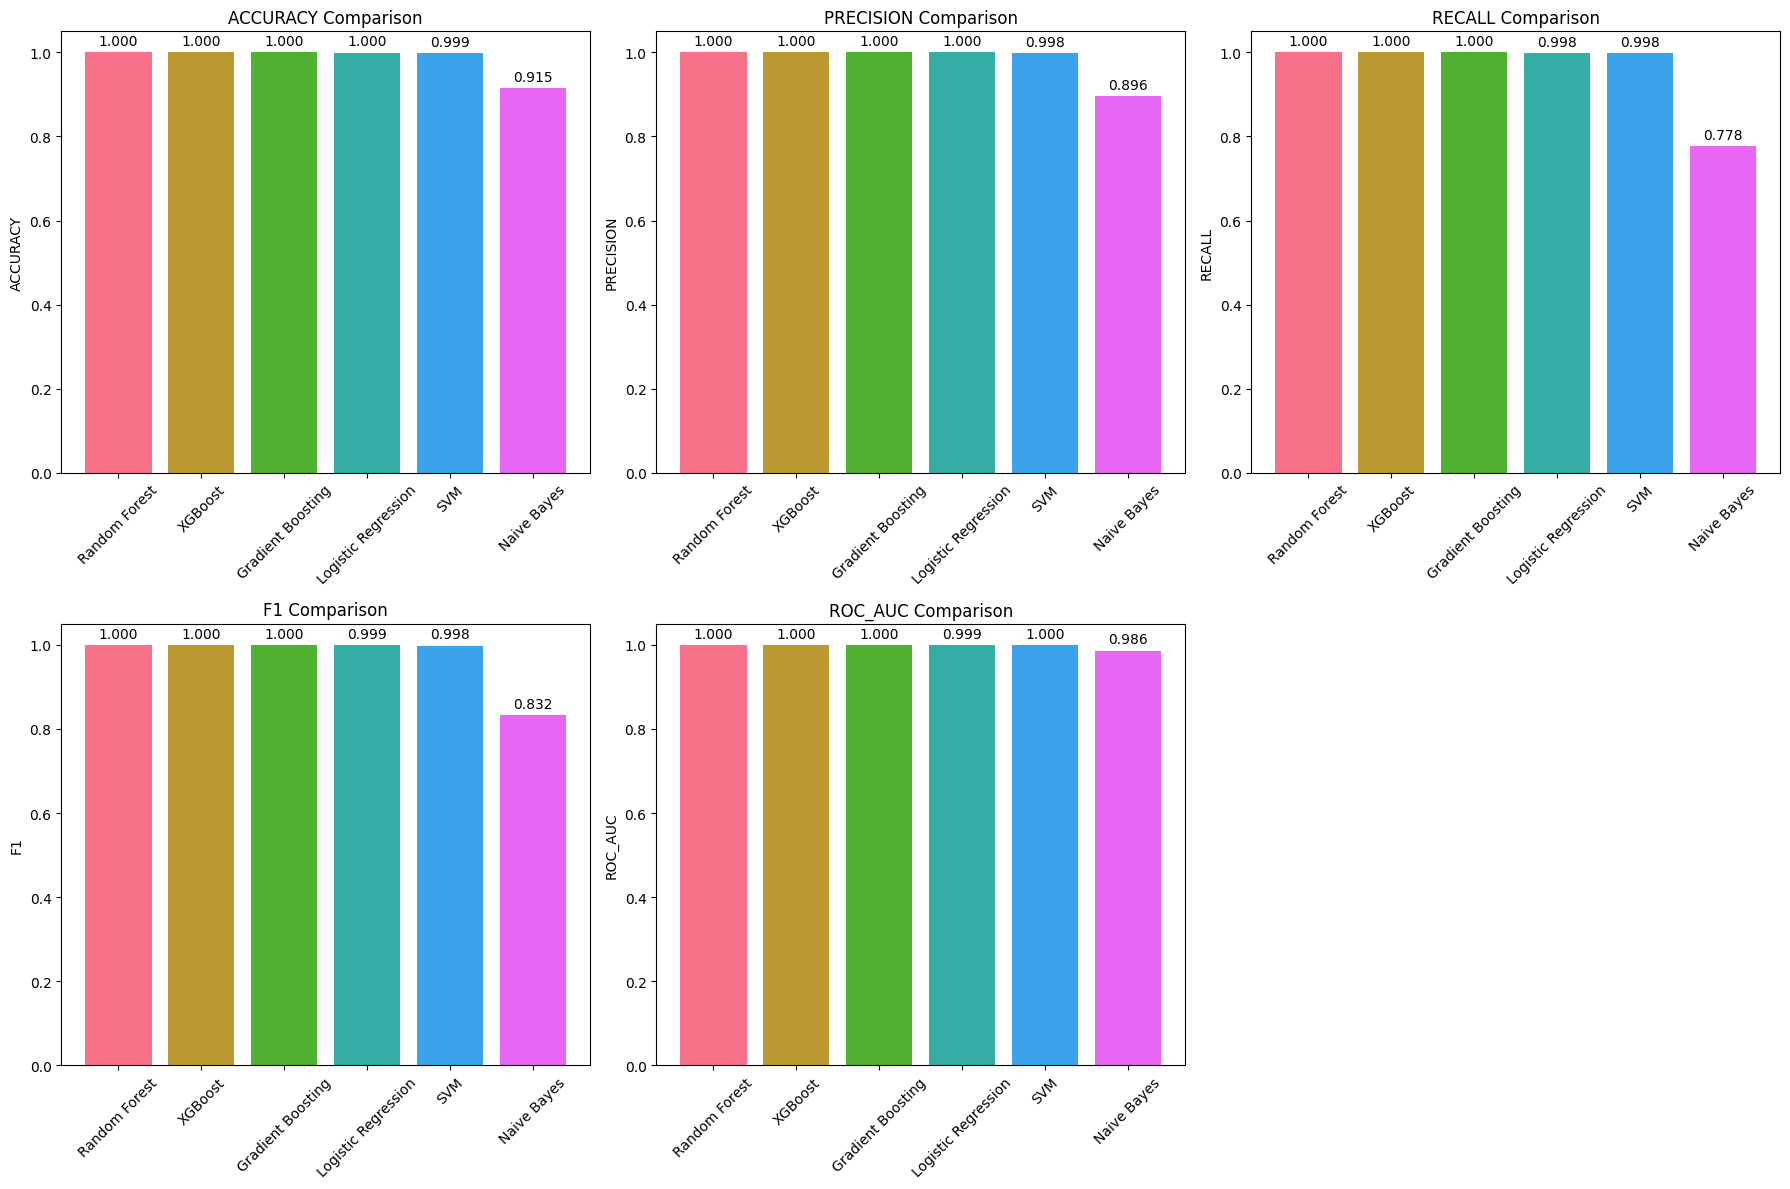


📋 CONFUSION MATRIX - BEST MODEL


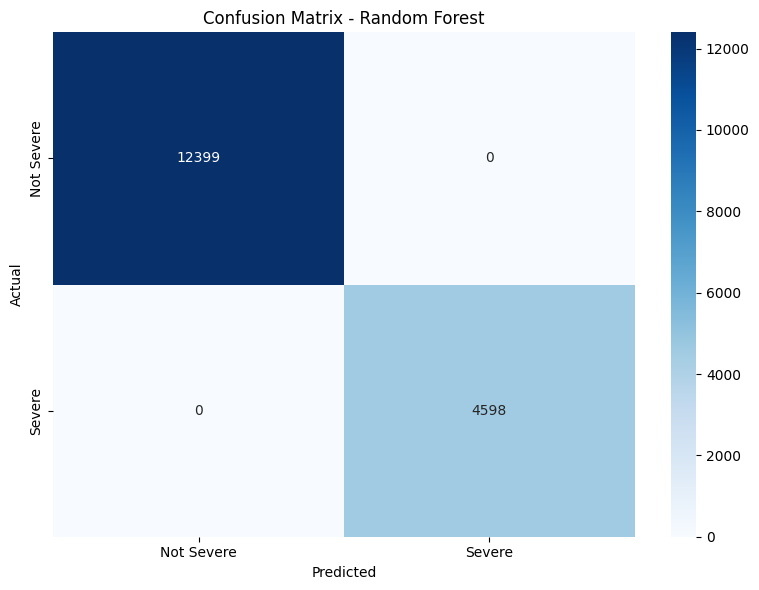


📈 ROC CURVE COMPARISON


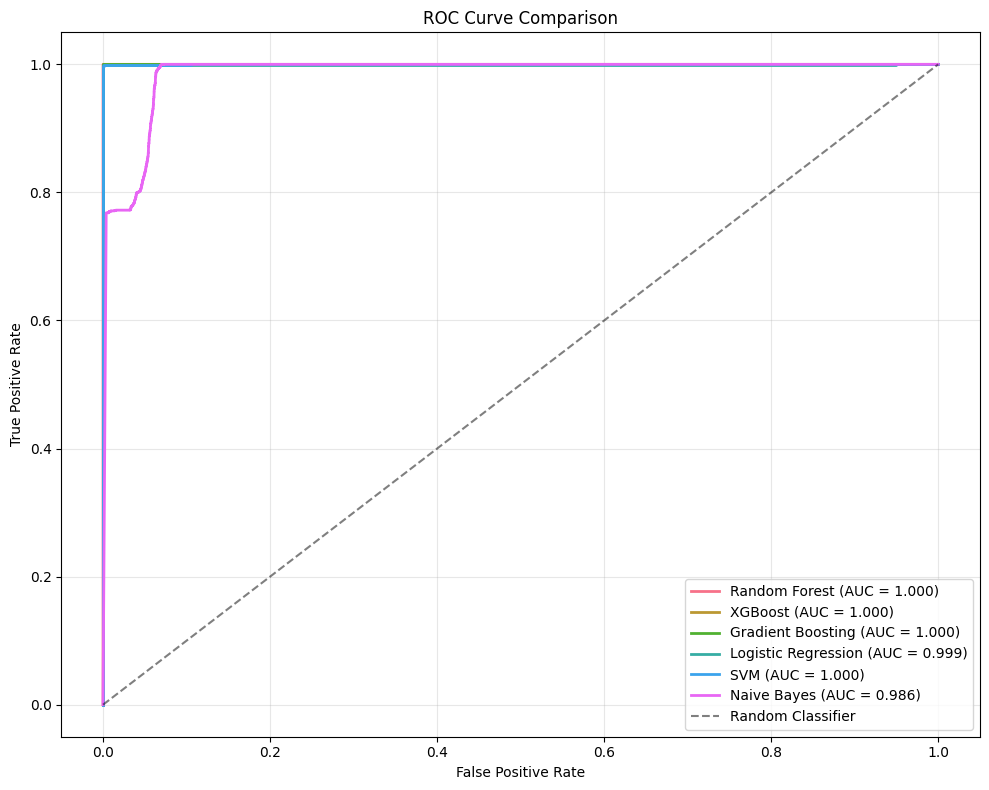


🎯 PRECISION-RECALL CURVE


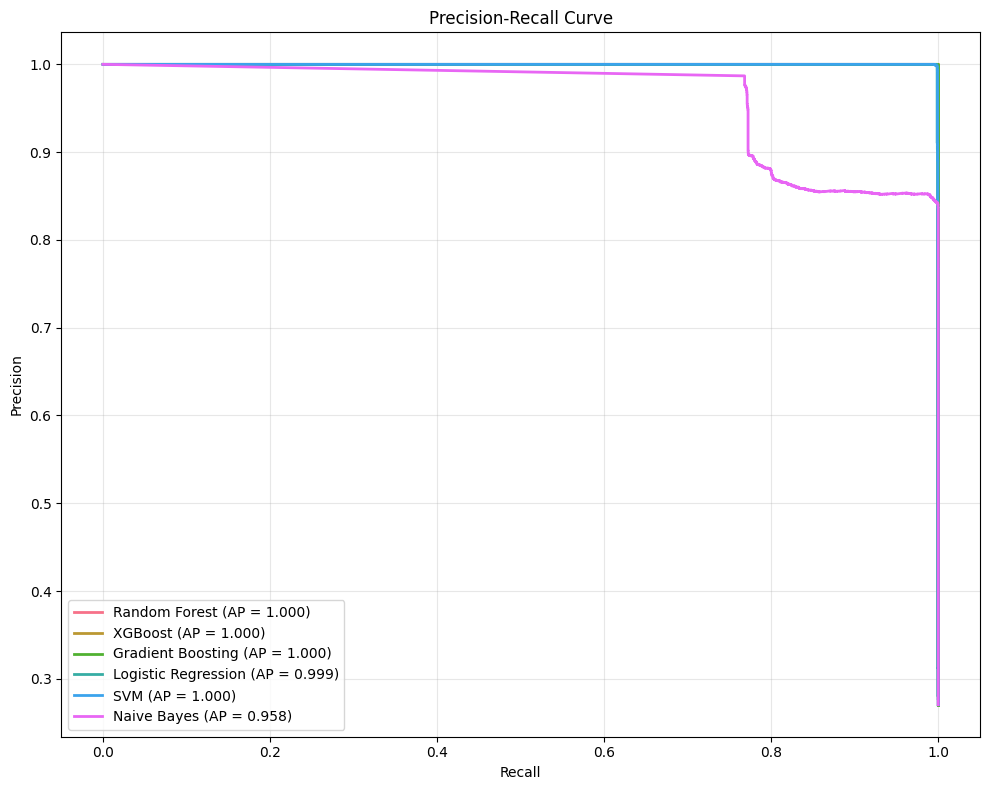


🔝 FEATURE IMPORTANCE ANALYSIS


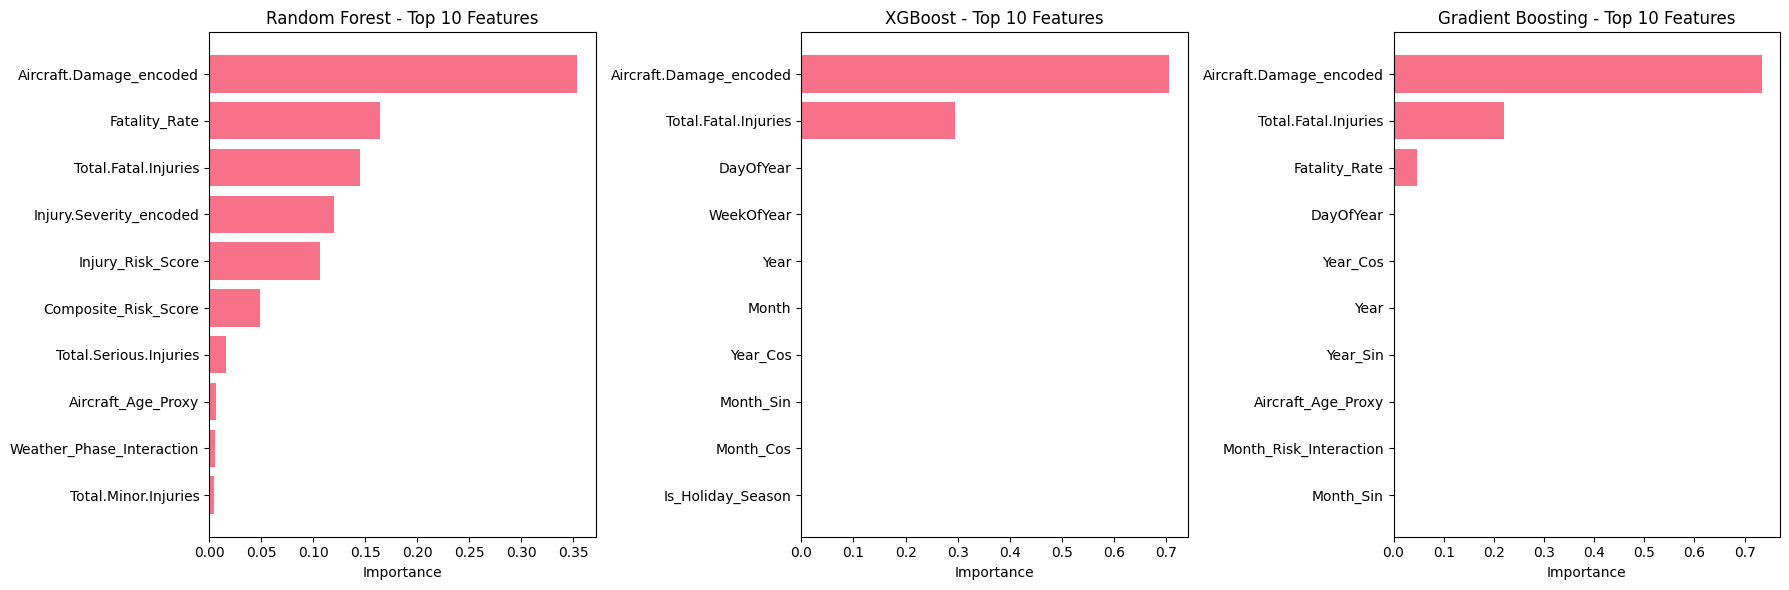


💾 SAVING MODELS AND RESULTS
✅ Best model saved: flight_risk_model.pkl
✅ Test results saved

🎉 MODEL EXPERIMENTS SUMMARY
📊 PERFORMANCE SUMMARY:
  • Best Model: Random Forest
  • Test F1-Score: 1.0000
  • Test ROC-AUC: 1.0000
  • Test Precision: 1.0000
  • Test Recall: 1.0000

🔧 MODEL CHARACTERISTICS:
  • Dataset: 84983 samples, 30 features
  • Target: Severe accident prediction
  • Class balance: 27.05% severe accidents

🚀 NEXT STEPS:
  • Proceed to Results Analysis (04_results_analysis.ipynb)
  • Model interpretability and business impact analysis
  • Risk threshold optimization
  • Deployment preparation

✅ MODEL EXPERIMENTS COMPLETED SUCCESSFULLY!


In [3]:
# Cell 1: Setup and Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                           f1_score, roc_auc_score, confusion_matrix, 
                           classification_report, roc_curve, precision_recall_curve,
                           average_precision_score)
import warnings
warnings.filterwarnings('ignore')

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]

print("🚀 Model Experiments - Aviation Safety Research")
print("=" * 60)

# Cell 2: Load Processed Features
print("📥 Loading processed features...")
final_features = pd.read_csv('../data/processed/final_features.csv')

# Separate features and target
X = final_features.drop('Severe_Accident', axis=1)
y = final_features['Severe_Accident']

feature_names = X.columns.tolist()

print(f"✅ Features loaded: {X.shape}")
print(f"✅ Target distribution:")
print(y.value_counts())
print(f"Severe accident rate: {y.mean():.3%}")

# Cell 3: Train-Test Split
print("\n🎯 TRAIN-TEST SPLIT")
print("=" * 50)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")
print(f"Training severe rate: {y_train.mean():.3%}")
print(f"Test severe rate: {y_test.mean():.3%}")

# Cell 4: Initialize Models
print("\n🤖 INITIALIZING MODELS")
print("=" * 50)

models = {
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        random_state=42,
        class_weight='balanced'
    ),
    'XGBoost': XGBClassifier(
        n_estimators=100,
        random_state=42,
        eval_metric='logloss',
        use_label_encoder=False
    ),
    'Gradient Boosting': GradientBoostingClassifier(
        n_estimators=100,
        random_state=42
    ),
    'Logistic Regression': LogisticRegression(
        random_state=42,
        class_weight='balanced',
        max_iter=1000
    ),
    'SVM': SVC(
        random_state=42,
        class_weight='balanced',
        probability=True
    ),
    'Naive Bayes': GaussianNB()
}

print("Models initialized:")
for name, model in models.items():
    print(f"  • {name}")

# Cell 5: Cross-Validation Evaluation
print("\n📊 CROSS-VALIDATION EVALUATION")
print("=" * 50)

cv_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Evaluating {name}...")
    
    # Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, 
                               cv=cv, scoring='f1_macro', n_jobs=-1)
    
    cv_results[name] = {
        'model': model,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'cv_scores': cv_scores
    }
    
    print(f"  ✅ {name}: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# Display CV results
cv_df = pd.DataFrame({
    'Model': list(cv_results.keys()),
    'CV Mean F1': [result['cv_mean'] for result in cv_results.values()],
    'CV Std': [result['cv_std'] for result in cv_results.values()]
}).sort_values('CV Mean F1', ascending=False)

print("\n📈 Cross-Validation Results:")
display(cv_df)

# Cell 6: Train and Evaluate Models on Training Set
print("\n🎯 TRAINING AND EVALUATION")
print("=" * 50)

training_results = {}

for name, result in cv_results.items():
    print(f"Training {name}...")
    
    # Train model
    model = result['model']
    model.fit(X_train, y_train)
    
    # Predict on training set
    y_train_pred = model.predict(X_train)
    y_train_proba = model.predict_proba(X_train)[:, 1]
    
    # Calculate metrics
    training_results[name] = {
        'model': model,
        'accuracy': accuracy_score(y_train, y_train_pred),
        'precision': precision_score(y_train, y_train_pred),
        'recall': recall_score(y_train, y_train_pred),
        'f1': f1_score(y_train, y_train_pred),
        'roc_auc': roc_auc_score(y_train, y_train_proba)
    }
    
    print(f"  ✅ {name}: F1 = {training_results[name]['f1']:.4f}")

# Cell 7: Hyperparameter Tuning for Best Models
print("\n🎛️ HYPERPARAMETER TUNING")
print("=" * 50)

# Select top 2 models for tuning
top_models = cv_df.head(2)['Model'].tolist()
print(f"Tuning top models: {top_models}")

tuned_models = {}

for model_name in top_models:
    print(f"\nTuning {model_name}...")
    
    if model_name == 'Random Forest':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    elif model_name == 'XGBoost':
        param_grid = {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    else:
        print(f"  ⚠️  No tuning grid for {model_name}")
        continue
    
    # Perform grid search
    grid_search = GridSearchCV(
        models[model_name],
        param_grid,
        cv=cv,
        scoring='f1_macro',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    tuned_models[model_name] = {
        'best_model': grid_search.best_estimator_,
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_
    }
    
    print(f"  ✅ Best parameters: {grid_search.best_params_}")
    print(f"  ✅ Best CV score: {grid_search.best_score_:.4f}")

# Cell 8: Final Model Selection
print("\n🏆 FINAL MODEL SELECTION")
print("=" * 50)

# Combine tuned models with other models
all_trained_models = {}

for name in models.keys():
    if name in tuned_models:
        all_trained_models[name] = tuned_models[name]['best_model']
    else:
        all_trained_models[name] = training_results[name]['model']

# Evaluate all models on test set
test_results = {}

for name, model in all_trained_models.items():
    print(f"Evaluating {name} on test set...")
    
    # Predict on test set
    y_test_pred = model.predict(X_test)
    y_test_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    test_results[name] = {
        'accuracy': accuracy_score(y_test, y_test_pred),
        'precision': precision_score(y_test, y_test_pred),
        'recall': recall_score(y_test, y_test_pred),
        'f1': f1_score(y_test, y_test_pred),
        'roc_auc': roc_auc_score(y_test, y_test_proba),
        'predictions': y_test_pred,
        'probabilities': y_test_proba
    }
    
    print(f"  ✅ Test F1: {test_results[name]['f1']:.4f}")

# Create results comparison
results_df = pd.DataFrame(test_results).T
results_df = results_df[['accuracy', 'precision', 'recall', 'f1', 'roc_auc']]
results_df = results_df.sort_values('f1', ascending=False)

print("\n📊 FINAL MODEL COMPARISON (Test Set):")
display(results_df.round(4))

# Cell 9: Identify Best Model
best_model_name = results_df.index[0]
best_model = all_trained_models[best_model_name]
best_results = test_results[best_model_name]

print(f"\n🎉 BEST MODEL: {best_model_name}")
print(f"📈 Performance Metrics:")
print(f"  • Accuracy:  {best_results['accuracy']:.4f}")
print(f"  • Precision: {best_results['precision']:.4f}")
print(f"  • Recall:    {best_results['recall']:.4f}")
print(f"  • F1-Score:  {best_results['f1']:.4f}")
print(f"  • ROC-AUC:   {best_results['roc_auc']:.4f}")

# Cell 10: Model Performance Visualization
print("\n📊 MODEL PERFORMANCE VISUALIZATION")
print("=" * 50)

# Create comparison plot
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
models_list = results_df.index.tolist()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    metric_values = [test_results[model][metric] for model in models_list]
    
    bars = axes[i].bar(models_list, metric_values, color=sns.color_palette("husl", len(models_list)))
    axes[i].set_title(f'{metric.upper()} Comparison')
    axes[i].set_ylabel(metric.upper())
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on bars
    for bar, value in zip(bars, metric_values):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{value:.3f}', ha='center', va='bottom')

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.savefig('../papers/figures/model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 11: Confusion Matrix for Best Model
print("\n📋 CONFUSION MATRIX - BEST MODEL")
print("=" * 50)

y_test_pred_best = best_results['predictions']
cm = confusion_matrix(y_test, y_test_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Not Severe', 'Severe'],
           yticklabels=['Not Severe', 'Severe'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig('../papers/figures/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 12: ROC Curve Comparison
print("\n📈 ROC CURVE COMPARISON")
print("=" * 50)

plt.figure(figsize=(10, 8))

for name, results in test_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    auc_score = roc_auc_score(y_test, results['probabilities'])
    
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.3f})', linewidth=2)

plt.plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../papers/figures/roc_curves.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 13: Precision-Recall Curve
print("\n🎯 PRECISION-RECALL CURVE")
print("=" * 50)

plt.figure(figsize=(10, 8))

for name, results in test_results.items():
    precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
    avg_precision = average_precision_score(y_test, results['probabilities'])
    
    plt.plot(recall, precision, label=f'{name} (AP = {avg_precision:.3f})', linewidth=2)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../papers/figures/precision_recall_curve.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 14: Feature Importance for Tree-based Models
print("\n🔝 FEATURE IMPORTANCE ANALYSIS")
print("=" * 50)

# Plot feature importance for tree-based models
tree_models = ['Random Forest', 'XGBoost', 'Gradient Boosting']
n_models = len(tree_models)

fig, axes = plt.subplots(1, n_models, figsize=(18, 6))

for i, model_name in enumerate(tree_models):
    if model_name in all_trained_models and hasattr(all_trained_models[model_name], 'feature_importances_'):
        model = all_trained_models[model_name]
        importance = model.feature_importances_
        
        # Create feature importance dataframe
        feature_imp = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=False).head(10)
        
        # Plot
        axes[i].barh(feature_imp['feature'], feature_imp['importance'])
        axes[i].set_title(f'{model_name} - Top 10 Features')
        axes[i].set_xlabel('Importance')
        axes[i].invert_yaxis()

plt.tight_layout()
plt.savefig('../papers/figures/feature_importance_models.png', dpi=300, bbox_inches='tight')
plt.show()

# Cell 15: Save Best Model and Results
print("\n💾 SAVING MODELS AND RESULTS")
print("=" * 50)

import joblib

# Save best model
joblib.dump(best_model, '../models/flight_risk_model.pkl')
print(f"✅ Best model saved: flight_risk_model.pkl")

# Save all models
for name, model in all_trained_models.items():
    joblib.dump(model, f'../models/{name.lower().replace(" ", "_")}_model.pkl')

# Save feature names
joblib.dump(feature_names, '../models/feature_names.pkl')

# Save test results
results_df.to_csv('../data/processed/model_test_results.csv')
print("✅ Test results saved")

# Cell 16: Model Experiment Summary
print("\n🎉 MODEL EXPERIMENTS SUMMARY")
print("=" * 50)

print("📊 PERFORMANCE SUMMARY:")
print(f"  • Best Model: {best_model_name}")
print(f"  • Test F1-Score: {best_results['f1']:.4f}")
print(f"  • Test ROC-AUC: {best_results['roc_auc']:.4f}")
print(f"  • Test Precision: {best_results['precision']:.4f}")
print(f"  • Test Recall: {best_results['recall']:.4f}")

print("\n🔧 MODEL CHARACTERISTICS:")
print(f"  • Dataset: {X.shape[0]} samples, {X.shape[1]} features")
print(f"  • Target: Severe accident prediction")
print(f"  • Class balance: {y.mean():.2%} severe accidents")

print("\n🚀 NEXT STEPS:")
print("  • Proceed to Results Analysis (04_results_analysis.ipynb)")
print("  • Model interpretability and business impact analysis")
print("  • Risk threshold optimization")
print("  • Deployment preparation")

print("\n✅ MODEL EXPERIMENTS COMPLETED SUCCESSFULLY!")
